# Turkiye Student Evaluation Data Set

**Unsupervised Machine Learning**

Unsupervised learning is where you only have input data (X) and no corresponding output variables.
The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data.

Unsupervised learning problems can be further grouped into clustering and association problems :
Clustering: A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.
Association: An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.

Some popular examples of unsupervised learning algorithms are:

**Clusturing :**

- k-means

- Hierarchial

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [2]:
dataset = pd.read_csv('turkiye-student-evaluation_generic.csv')

In [3]:
dataset.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
dataset.shape

(5820, 33)

**info()** function from provides an overview f the data like the number of records present in the data and number of columns and data type of column. It gives an overview of what kind of data we are dealing with.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

**instr:** Instructor's identifier; values taken from {1,2,3}

**class:** Course code (descriptor); values taken from {1-13}

**repeat:** Number of times the student is taking this course; values taken from {0,1,2,3,...}

**attendance:** Code of the level of attendance; values from {0, 1, 2, 3, 4}

**difficulty:** Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}

**Q1:** The semester course content, teaching method and evaluation system were provided at the start.

**Q2:** The course aims and objectives were clearly stated at the beginning of the period.

**Q3:** The course was worth the amount of credit assigned to it.

**Q4:** The course was taught according to the syllabus announced on the first day of class.

**Q5:** The class discussions, homework assignments, applications and studies were satisfactory.

**Q6:** The textbook and other courses resources were sufficient and up to date.

**Q7:** The course allowed field work, applications, laboratory, discussion and other studies.

**Q8:** The quizzes, assignments, projects and exams contributed to helping the learning.

**Q9:** I greatly enjoyed the class and was eager to actively participate during the lectures.

**Q10:** My initial expectations about the course were met at the end of the period or year.

**Q11:** The course was relevant and beneficial to my professional development.

**Q12:** The course helped me look at life and the world with a new perspective.

**Q13:** The Instructor's knowledge was relevant and up to date.

**Q14:** The Instructor came prepared for classes.

**Q15:** The Instructor taught in accordance with the announced lesson plan.

**Q16:** The Instructor was committed to the course and was understandable.

**Q17:** The Instructor arrived on time for classes.

**Q18:** The Instructor has a smooth and easy to follow delivery/speech.

**Q19:** The Instructor made effective use of class hours.

**Q20:** The Instructor explained the course and was eager to be helpful to students.

**Q21:** The Instructor demonstrated a positive approach to students.

**Q22:** The Instructor was open and respectful of the views of students about the course.

**Q23:** The Instructor encouraged participation in the course.

**Q24:** The Instructor gave relevant homework assignments/projects, and helped/guided students.

**Q25:** The Instructor responded to questions about the course inside and outside of the course.

**Q26:** The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.

**Q27:** The Instructor provided solutions to exams and discussed them with students.

**Q28:** The Instructor treated all students in a right and objective manner.

**Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}**

## Data Cleaning

In [6]:
dataset.isnull().any()

instr         False
class         False
nb.repeat     False
attendance    False
difficulty    False
Q1            False
Q2            False
Q3            False
Q4            False
Q5            False
Q6            False
Q7            False
Q8            False
Q9            False
Q10           False
Q11           False
Q12           False
Q13           False
Q14           False
Q15           False
Q16           False
Q17           False
Q18           False
Q19           False
Q20           False
Q21           False
Q22           False
Q23           False
Q24           False
Q25           False
Q26           False
Q27           False
Q28           False
dtype: bool

Here, we see that there are no null values.

## EDA 

**describe()** function generates descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distributions.

In [7]:
dataset.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
dataset.shape

(5820, 33)

To Understand for which course the students have given the most responses and it is found to be Course 3 from below graph

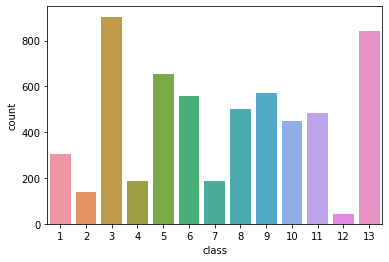

In [9]:
sns.countplot(x='class',data=dataset)
# sns.pairplot(data)
plt.show()

Below Graph to see how the rating has been given by student for each questions

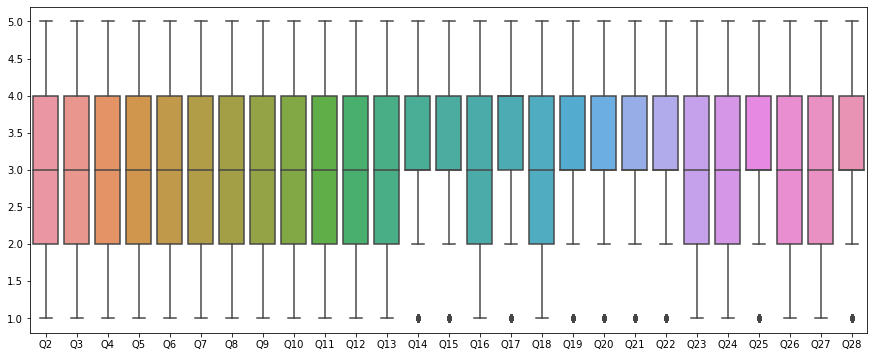

In [10]:
plt.figure(figsize=(15,6))
sns.boxplot(data=dataset.iloc[:,6:])
plt.show()

By above graph, we can see that very less students have given completely disagree (Rating 1) for Question Q14, Q15, Q17, Q19 - Q22, Q25

Lets understand the students have reponded for the questions against classes

In [11]:
# Calculate mean for each question response for all the classes.
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in range(1,13):
    class_data = dataset[(dataset["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    #Class related questions are from Q1 to Q12
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num] 
    print(classlist)
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


<AxesSubplot:xlabel='questions', ylabel='mean'>

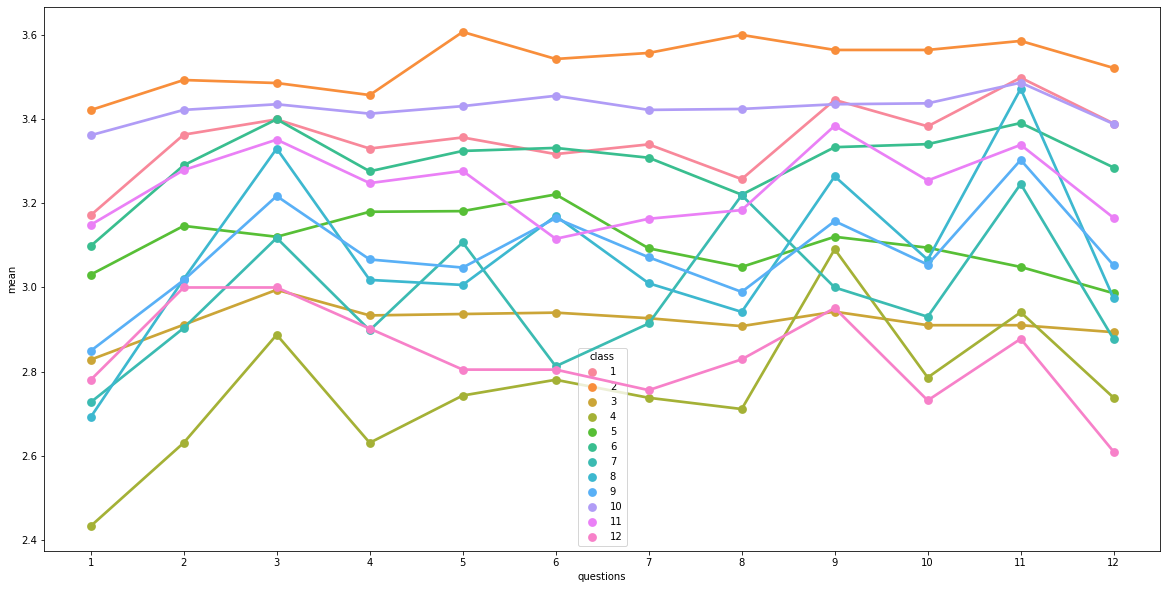

In [12]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

Above graph shows that we have best ratings from Class 2 and worst rateing from class 4 students

Lets see how rating has been given against instructor wise.

In [13]:
# Calculate mean for each question response for all the classes.
questionmeans = []
inslist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
for ins_num in range(1,4):
    ins_data = dataset[(dataset["instr"]==ins_num)]
    questionmeans = []
    inslist = []
    questions = []
    
    for num in range(13,29):
        questions.append(num)
    
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())
    inslist += 16 * [ins_num] 
    plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

<AxesSubplot:xlabel='questions', ylabel='mean'>

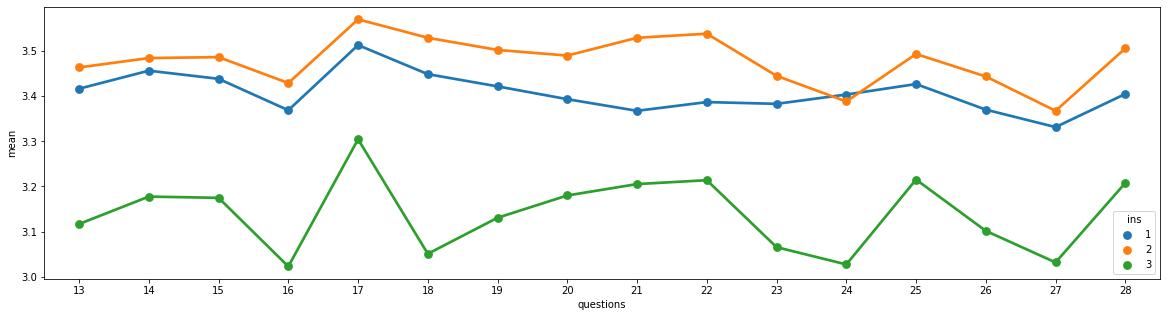

In [14]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="ins")

Based on above graph we can see that According to the Student ratings we see that Instructor 1 and 2 are performing well and got similar rateings but Instructor 3 got less ratings. So we can further explore which course instructor 3 teaches and find out the which course got least ratings.

In [15]:
# Calculate mean for each question response for all the classes for Instructor 3
dataset_inst3 = dataset[(dataset["instr"]==3)]
class_array_for_inst3 = dataset_inst3["class"].unique().tolist()
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in class_array_for_inst3:
    class_data = dataset_inst3[(dataset_inst3["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num]
    
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

<AxesSubplot:xlabel='questions', ylabel='mean'>

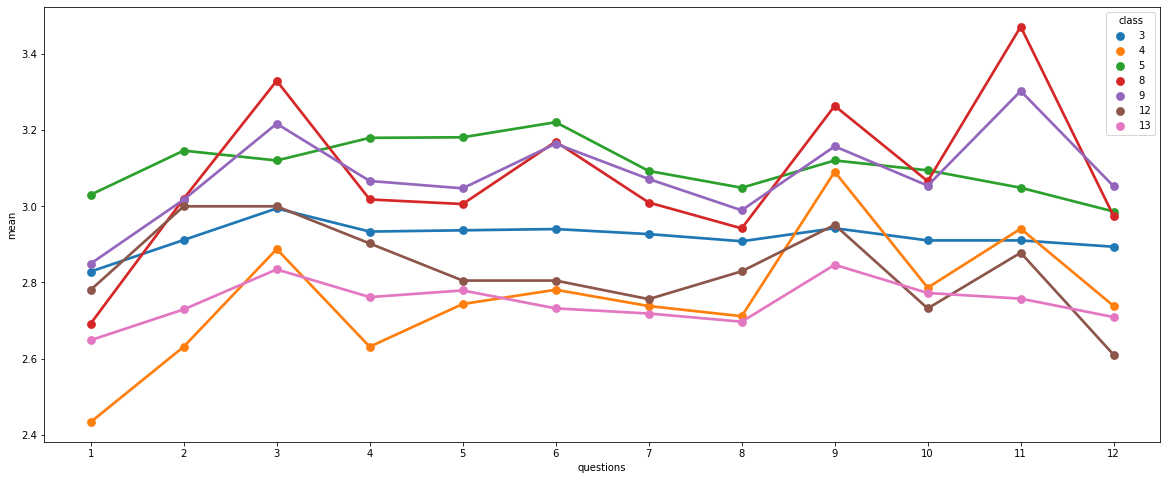

In [16]:
plt.figure(figsize=(20, 8))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

By above analysis we can recommend the instructor 3 for check on course 4 and 13.

## Data Preprocessing 

**In this section, we will be preprocessing the data to perform clustering operations.**

The following steps are applied to preprocess the data:

- Scaling the features using the standard scaler
- Creating a subset dataframe for dimensionality reduction

In [17]:
sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(dataset),columns=dataset.columns)

In [18]:
data

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,0.71607,1.552042,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160
5816,0.71607,1.552042,-0.402174,0.897990,0.901862,0.798012,0.720635,0.655231,0.714315,0.699173,...,1.370552,1.342957,1.332907,1.326612,0.627208,1.436873,1.342258,1.399225,1.428430,1.323265
5817,0.71607,1.552042,-0.402174,-1.136118,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
5818,0.71607,1.552042,-0.402174,-0.458082,-0.580860,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


**So let's starting making our model.**

**Firstly, we will try to reduce dimensionality.**

There are two principal algorithms for dimensionality reduction: **Linear Discriminant Analysis ( LDA )** and **Principal Component Analysis ( PCA )**. The basic difference between these two is that LDA uses information of classes to find new features in order to maximize its separability while PCA uses the variance of each feature to do the same. In this context, LDA can be consider a supervised algorithm and **PCA an unsupervised algorithm**.

The idea behind PCA is simply to find a low-dimension set of axes that summarize data. Many of these features will measure related properties and so will be redundant. Therefore, we should remove these redundancy and describe each dataset with less properties. This is exactly what PCA aims to do.

In [19]:
pca = PCA()
pca.fit(data)
data_pca = pd.DataFrame(pca.transform(data))
data_pca.shape

(5820, 33)

In [20]:
data_pca.head(10)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.742313,-0.109720,1.314249,-1.204991,-0.270151,1.967465,-1.256575,-0.213486,0.179397,-0.151077,...,-0.002946,0.015726,-0.015960,-0.000653,0.027858,0.012553,0.013056,0.010127,-0.003773,-0.002585
1,0.727500,-0.147146,1.281206,-1.411373,-0.169145,1.776010,-0.331655,0.003060,0.069404,-0.142974,...,-0.007780,0.021240,-0.014529,-0.003723,0.031515,0.010197,0.006358,0.011611,-0.005024,-0.005501
2,-7.586498,0.364230,1.519714,-1.093795,-0.341108,1.509401,-0.487971,-0.019713,0.111545,-0.192753,...,-0.009300,0.028723,-0.027405,0.008197,0.017031,0.006589,-0.000718,0.019963,-0.002749,-0.006387
3,0.727500,-0.147146,1.281206,-1.411373,-0.169145,1.776010,-0.331655,0.003060,0.069404,-0.142974,...,-0.007780,0.021240,-0.014529,-0.003723,0.031515,0.010197,0.006358,0.011611,-0.005024,-0.005501
4,9.054785,-1.113471,0.825711,-1.913832,0.105926,2.042081,0.308051,0.148811,0.012646,-0.101078,...,-0.008718,0.015282,0.001292,-0.017868,0.045713,0.013015,0.009845,0.003848,-0.008541,-0.005401
5,-3.465004,0.507352,1.567882,-1.377277,-0.206727,1.356063,0.494177,0.193512,-0.059897,-0.147824,...,-0.013334,0.031728,-0.021766,-0.000142,0.030044,0.005648,-0.003639,0.017424,-0.004519,-0.009531
6,-3.408806,-0.327695,1.199995,-1.334274,-0.202521,1.737894,-0.388882,0.006380,0.130853,-0.179799,...,-0.008580,0.023749,-0.018737,0.001547,0.022159,0.008781,0.002581,0.015634,-0.004504,-0.005273
7,-7.545112,-0.508243,1.118783,-1.257174,-0.235896,1.699778,-0.446110,0.009700,0.192302,-0.216624,...,-0.009379,0.026258,-0.022945,0.006816,0.012802,0.007365,-0.001197,0.019658,-0.003984,-0.005046
8,-3.550615,-0.365196,1.274417,-1.316222,-0.204987,1.703726,-0.294489,-0.313662,0.347195,-0.389465,...,0.107391,-0.060344,-0.055020,0.028086,-0.042431,-0.041120,0.079955,-0.007133,-0.011912,0.000156
9,-3.506390,1.379825,1.968812,-1.213898,-0.311939,1.165686,0.452316,0.164100,-0.140655,-0.123954,...,-0.013255,0.034193,-0.026226,0.001239,0.034273,0.004871,-0.003160,0.017730,-0.003284,-0.010872


## Clustering 

**Elbow Plot**

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

Here, I tried to plot the cluster numbers as the x-axis and their respective score on the y axis. By observing the graph, using the elbow method dividing the data frame into 3 clusters gives proper results.

**Silhouette Analysis**

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

For n_clusters=2, the silhouette score is 0.35226802452931283
For n_clusters=3, the silhouette score is 0.31927609752356817
For n_clusters=4, the silhouette score is 0.26119084014393434
For n_clusters=5, the silhouette score is 0.24678331882802598
For n_clusters=6, the silhouette score is 0.24818610536360997
For n_clusters=7, the silhouette score is 0.2261144867069486
For n_clusters=8, the silhouette score is 0.22224115031154462
For n_clusters=9, the silhouette score is 0.1796460339695163
For n_clusters=10, the silhouette score is 0.1757572474456438


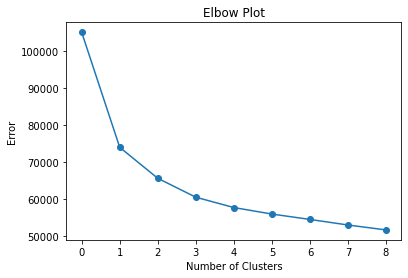

In [21]:
# we are going to try clusters from 2 to 10
K = range(2, 11)
SSE = [] #Sum of Squared Residuals
silhouettes = []
for k in K:
    # build the clustering model
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(data_pca)
    SSE.append(kmeans.inertia_)

    
    # silhouette score
    silhouette_avg = silhouette_score(data_pca, kmeans.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))
    silhouettes.append(silhouette_avg)
plt.plot(SSE, marker = "o");
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.show()

Based on the Silhouette, we can go for 2 clusters.

The K-means algorithm identifies k(here k=2) number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

In [24]:
pca_df = data_pca.copy()
kmeans = KMeans(2, n_init=10, max_iter=100)
kmeans.fit(pca_df)
pca_df['label'] = kmeans.labels_
pca_df['label'].value_counts()

1    3142
0    2678
Name: label, dtype: int64

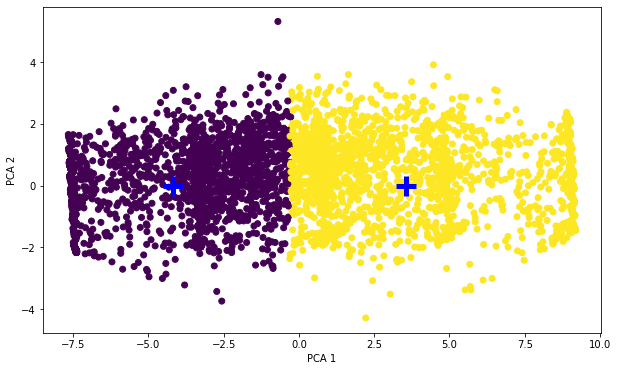

In [25]:
fig = plt.figure(figsize=(10,6))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="blue", marker="+", s=400, linewidth=5,)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

Looking at the above graph, we saw 2 clusters of students who have given like Negative and Positive feedback

So we have 3145 students who have given negative ratings overall and 2675 students with positive response

**Hierarchical clustering**, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

In [26]:
def calculate_score(affinity, linkage):
    
    print("Affinity type:", affinity)
    print("Linkage type:", linkage)
    range_n_clusters = [2, 3, 4, 5, 6]
    for num_clusters in range_n_clusters:
    
        # intialise AgglomerativeClustering
        clusterer = AgglomerativeClustering(n_clusters=num_clusters, affinity=affinity, linkage=linkage)
        cluster_labels = clusterer.fit_predict(data_pca)

        # silhouette score
        silhouette_avg = silhouette_score(data_pca, cluster_labels)
        print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [27]:
print(calculate_score('cosine', 'single'));
print(calculate_score('cosine', 'average'));
print(calculate_score('cosine', 'complete'));

Affinity type: cosine
Linkage type: single
For n_clusters=2, the silhouette score is 0.3042159259528038
For n_clusters=3, the silhouette score is -0.1396484512609657
For n_clusters=4, the silhouette score is -0.15914538629590466
For n_clusters=5, the silhouette score is -0.1820032683040801
For n_clusters=6, the silhouette score is -0.18378033940641117
None
Affinity type: cosine
Linkage type: average
For n_clusters=2, the silhouette score is 0.33885699627597726
For n_clusters=3, the silhouette score is 0.21672113370743248
For n_clusters=4, the silhouette score is 0.17772319353536856
For n_clusters=5, the silhouette score is 0.16811135482008674
For n_clusters=6, the silhouette score is 0.1663539315417594
None
Affinity type: cosine
Linkage type: complete
For n_clusters=2, the silhouette score is 0.31797359060265246
For n_clusters=3, the silhouette score is 0.10679475934862735
For n_clusters=4, the silhouette score is 0.1207507871818298
For n_clusters=5, the silhouette score is 0.092881479

In [28]:
print(calculate_score('euclidean', 'single'))
print(calculate_score('euclidean', 'average'))
print(calculate_score('euclidean', 'complete'))
print(calculate_score('euclidean', 'ward'))

Affinity type: euclidean
Linkage type: single
For n_clusters=2, the silhouette score is 0.3042159259528038
For n_clusters=3, the silhouette score is 0.22453629726999697
For n_clusters=4, the silhouette score is 0.1461275580279172
For n_clusters=5, the silhouette score is 0.11991818819409159
For n_clusters=6, the silhouette score is 0.11599500890895806
None
Affinity type: euclidean
Linkage type: average
For n_clusters=2, the silhouette score is 0.30378883675298274
For n_clusters=3, the silhouette score is 0.27982530465156213
For n_clusters=4, the silhouette score is 0.3822593703793516
For n_clusters=5, the silhouette score is 0.3311311366993349
For n_clusters=6, the silhouette score is 0.31694847974705065
None
Affinity type: euclidean
Linkage type: complete
For n_clusters=2, the silhouette score is 0.28698914260045577
For n_clusters=3, the silhouette score is 0.08783110158845552
For n_clusters=4, the silhouette score is 0.08726497741156337
For n_clusters=5, the silhouette score is 0.115

In [29]:
print(calculate_score('manhattan', 'single'))
print(calculate_score('manhattan', 'average'))
print(calculate_score('manhattan', 'complete'))

Affinity type: manhattan
Linkage type: single
For n_clusters=2, the silhouette score is 0.3042159259528038
For n_clusters=3, the silhouette score is 0.22453629726999697
For n_clusters=4, the silhouette score is 0.1461275580279172
For n_clusters=5, the silhouette score is 0.13971061346197133
For n_clusters=6, the silhouette score is 0.11599500890895806
None
Affinity type: manhattan
Linkage type: average
For n_clusters=2, the silhouette score is 0.3042159259528038
For n_clusters=3, the silhouette score is 0.22453629726999697
For n_clusters=4, the silhouette score is 0.1970099439093459
For n_clusters=5, the silhouette score is 0.11469714934058046
For n_clusters=6, the silhouette score is 0.1115991437217543
None
Affinity type: manhattan
Linkage type: complete
For n_clusters=2, the silhouette score is 0.3042159259528038
For n_clusters=3, the silhouette score is 0.2895075686677146
For n_clusters=4, the silhouette score is 0.14005400457337985
For n_clusters=5, the silhouette score is 0.144710

In [30]:
X = linkage(data_pca, method='ward', metric='euclidean')

In [31]:
cluster_labels = cut_tree(X, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 1, 1])

In [32]:
data['Cluster_Labels'] = cluster_labels
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Cluster_Labels
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,...,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,0
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,0
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,1


In [33]:
data['Cluster_Labels'].value_counts()

0    4431
1    1389
Name: Cluster_Labels, dtype: int64

A **dendrogram** is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering.

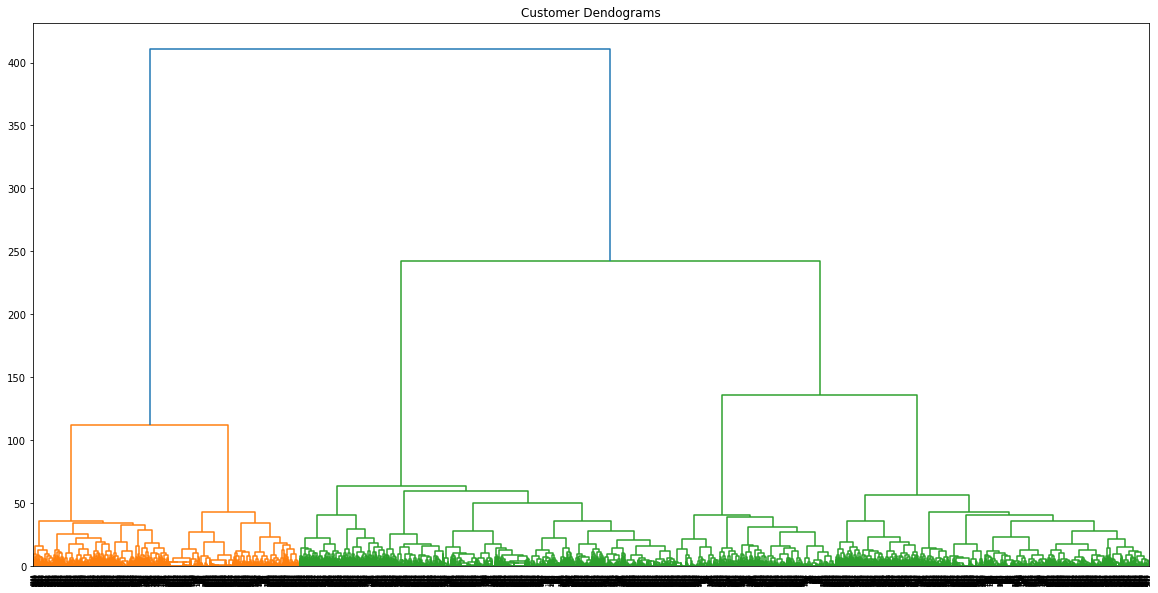

In [34]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data_pca, metric='euclidean', method='ward'))

From the above dendogram we can see 2 clusters.

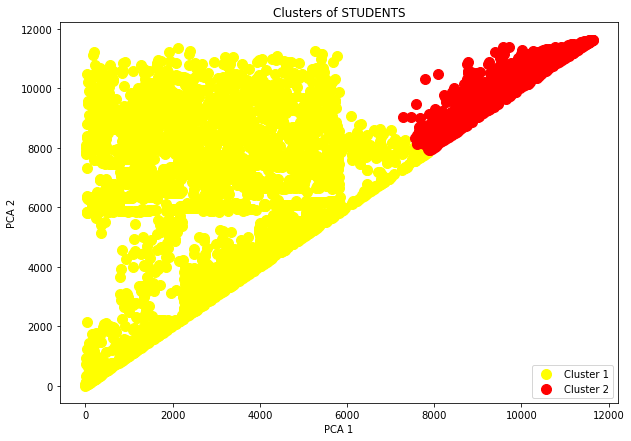

In [46]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

cluster.fit(X)
labels = cluster.labels_

plt.figure(figsize=(10, 7))

# Visualising the clusters
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

So we have 4431 students who have given negative ratings overall and 1389 students with positive response

If we compare the clusters of Kmeans and Hierarchical process, we can see cluster with yellow ( Negative is matching approximately)

**Conclusion**

In this project, we performed unsupervised clustering. We did use dimensionality reduction followed by agglomerative clustering.

K-Means Clustering with 2 Cluster Ids

- Students with Cluster Id 0 are the students who have given negative feedback.
- Students with Cluster Id 1 are the students who have given positive feedback.

Hierarchical Clustering with 2 Cluster Labels

- Students with Cluster Id 0 are the students who have given negative feedback.
- Students with Cluster Id 1 are the students who have given positive feedback.

As a result, we were able to segment the students into 2 different clusters based on different methodologies.